In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import corner

In [2]:
file_folder = os.path.expanduser(r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X')
filename1 = "hecto_ds_np.fits"
filename2 = "hecto_tp_ds_dp_improved_priors.fits"

datafile1 = os.path.join(file_folder, filename1)
datafile2 = os.path.join(file_folder, filename2)


print(datafile1)
print(datafile2)

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_ds_np.fits
C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_improved_priors.fits


In [3]:
with fits.open(datafile2) as hdu:
    hdu.info()

Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_improved_priors.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     42   30000R x 17C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
data_tp_file1, header_tp_file1 = fits.getdata(datafile1, header=True)

data_tp_file2, header_tp_file2 = fits.getdata(datafile2, header=True)
header_tp_file2

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  136 / length of dimension 1                          
NAXIS2  =                30000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   17 / number of table fields                         
TTYPE1  = 'Av      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'Teff    '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = '[Fe/H]  '        

In [5]:
data_tp_file2.dtype

dtype((numpy.record, [('Av', '>f8'), ('Teff', '>f8'), ('[Fe/H]', '>f8'), ('[a/Fe]', '>f8'), ('dist', '>f8'), ('log(R)', '>f8'), ('log(g)', '>f8'), ('lsf', '>f8'), ('pc0', '>f8'), ('pc1', '>f8'), ('pc2', '>f8'), ('pc3', '>f8'), ('photjitter', '>f8'), ('specjitter', '>f8'), ('vmic', '>f8'), ('vrad', '>f8'), ('vstar', '>f8')]))

In [6]:
data_tp_file2['[Fe/H]']

array([ 0.034053  ,  0.04177647, -0.07464182, ..., -0.02010139,
       -0.05578766, -0.07574981], dtype='>f8')

In [7]:
data_tp_file2['Teff']

array([5422.58116905, 5403.68883915, 5413.47569541, ..., 5347.42433008,
       5337.02629196, 5366.88233035], dtype='>f8')

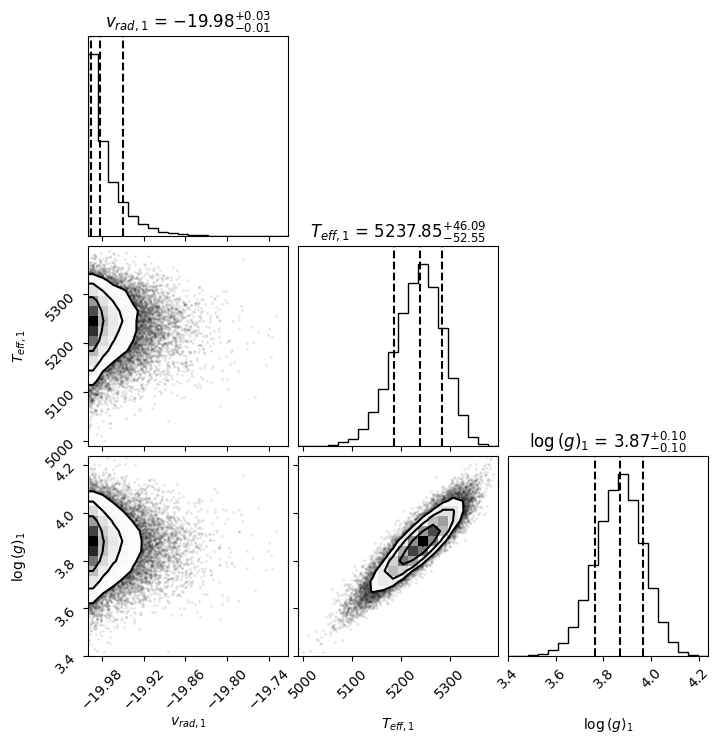

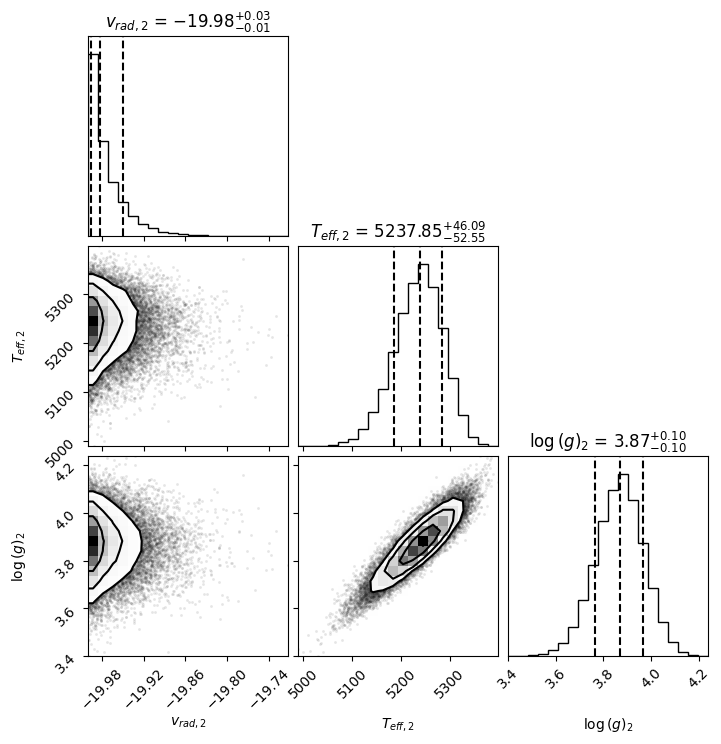

In [8]:
data_tp1 = np.vstack([data_tp_file1['vrad'], data_tp_file1['Teff'], data_tp_file1['log(g)']]).T
figure = corner.corner(
                        data_tp1,
                        labels = [
                                r"$v_{rad,1}$",
                                r"$T_{eff,1}$",
                                r"$\log{(g)}_1$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

data_tp2 = np.vstack([data_tp_file2['vrad'], data_tp_file2['Teff'], data_tp_file2['log(g)']]).T
figure = corner.corner(
                        data_tp1,
                        labels = [
                                r"$v_{rad,2}$",
                                r"$T_{eff,2}$",
                                r"$\log{(g)}_2$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

In [14]:
(np.min(data_tp_file2['vrad']),
np.min(data_tp_file1['vrad']))

(np.float64(-24.999775804810973), np.float64(-19.999759047709645))

In [9]:
data_tp2 = np.vstack([data_tp['[a/Fe]'], data_tp['Teff'], data_tp['[Fe/H]']]).T
figure = corner.corner(
    data_tp2,
    labels = [
        r"[$\alpha$/Fe]",
        r"$T_{eff}$",
        r"[Fe/H]"
    ],
    quantiles=[0.16,0.5,0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

NameError: name 'data_tp' is not defined